In [ ]:
import tensorflow as tf
import pandas as pd
import keras
from matplotlib import pyplot
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
# load dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
(test1X, test1y) = (x_test[0:5000], y_test[0:5000])
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (test1X.shape, test1y.shape))


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(5000, 28, 28), y=(5000,)




1.   hidden layer: relu
2.   optimizer: SGD


Epoch 1/30
1500/1500 - 5s - loss: 0.7426 - sparse_categorical_accuracy: 0.7564 - val_loss: 0.5484 - val_sparse_categorical_accuracy: 0.8073
Epoch 2/30
1500/1500 - 4s - loss: 0.5000 - sparse_categorical_accuracy: 0.8258 - val_loss: 0.4755 - val_sparse_categorical_accuracy: 0.8322
Epoch 3/30
1500/1500 - 4s - loss: 0.4542 - sparse_categorical_accuracy: 0.8408 - val_loss: 0.4457 - val_sparse_categorical_accuracy: 0.8444
Epoch 4/30
1500/1500 - 4s - loss: 0.4276 - sparse_categorical_accuracy: 0.8502 - val_loss: 0.4342 - val_sparse_categorical_accuracy: 0.8461
Epoch 5/30
1500/1500 - 4s - loss: 0.4052 - sparse_categorical_accuracy: 0.8583 - val_loss: 0.4090 - val_sparse_categorical_accuracy: 0.8553
Epoch 6/30
1500/1500 - 4s - loss: 0.3897 - sparse_categorical_accuracy: 0.8633 - val_loss: 0.3949 - val_sparse_categorical_accuracy: 0.8584
Epoch 7/30
1500/1500 - 4s - loss: 0.3756 - sparse_categorical_accuracy: 0.8686 - val_loss: 0.3888 - val_sparse_categorical_accuracy: 0.8632
Epoch 8/30
1500/1500

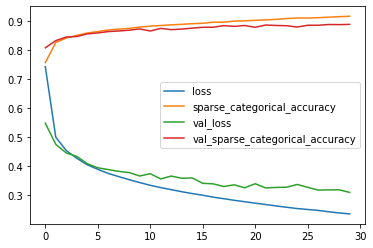

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    x_train,y_train,
    epochs=30, validation_split=0.2, verbose=2
)

history_df = pd.DataFrame(history.history)
history_df.plot()

loss, accuracy = model.evaluate(test1X, test1y)
print('accuracy is: ',accuracy, 'loss is:' ,loss)

[[4.9191121e-06 1.3104421e-08 7.2219115e-07 ... 9.1676461e-03
  8.8479574e-05 9.8707610e-01]
 [6.7780293e-06 1.3455959e-09 9.9701452e-01 ... 1.5424485e-12
  1.4248023e-08 1.5841239e-13]
 [2.0166528e-06 9.9999750e-01 7.9313011e-08 ... 2.5363684e-09
  3.2868360e-08 1.7759850e-12]
 ...
 [5.9410676e-09 4.1605851e-12 3.5403624e-12 ... 3.7692053e-07
  5.9965010e-12 9.9996817e-01]
 [6.0870534e-01 5.8680815e-03 2.1483861e-03 ... 4.2008054e-05
  1.0713136e-03 1.2008744e-06]
 [1.0322727e-06 1.3454620e-06 1.5999080e-07 ... 9.9904865e-01
  7.5610536e-05 9.6093507e-05]]
[[413   1   7  14   1   0  65   1   5   0]
 [  0 469   0  12   0   0   0   0   0   0]
 [ 11   1 398  11  56   0  43   1   0   0]
 [  8   7   3 448  13   0  18   0   3   0]
 [  0   0  46  21 420   0  34   0   0   0]
 [  0   0   0   0   0 465   0  13   1   6]
 [ 51   1  33  12  30   0 353   0   2   0]
 [  0   0   0   0   0   8   0 477   0  15]
 [  3   1   3   4   3   1  11   3 497   0]
 [  0   0   0   0   0   3   0  18   0 456]]


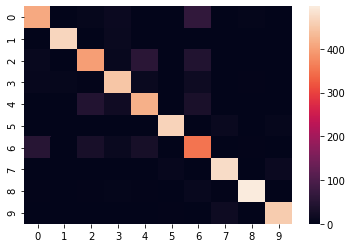

In [ ]:
predict = model.predict(test1X)
print(predict)
result = []
for s in range(len(predict)):
  maximum = max(predict[s])
  pre = [i for i, j in enumerate(predict[s]) if j == maximum]
  result.append(pre[0])

cf_matrix = confusion_matrix(test1y, result)
print(cf_matrix)
sns.heatmap(cf_matrix)

1. Hidden layer : relu
2. optimizer : adam




Epoch 1/30
1500/1500 - 5s - loss: 0.4921 - sparse_categorical_accuracy: 0.8226 - val_loss: 0.4112 - val_sparse_categorical_accuracy: 0.8480
Epoch 2/30
1500/1500 - 5s - loss: 0.3684 - sparse_categorical_accuracy: 0.8660 - val_loss: 0.3570 - val_sparse_categorical_accuracy: 0.8687
Epoch 3/30
1500/1500 - 5s - loss: 0.3286 - sparse_categorical_accuracy: 0.8780 - val_loss: 0.3549 - val_sparse_categorical_accuracy: 0.8733
Epoch 4/30
1500/1500 - 5s - loss: 0.3065 - sparse_categorical_accuracy: 0.8854 - val_loss: 0.3262 - val_sparse_categorical_accuracy: 0.8811
Epoch 5/30
1500/1500 - 5s - loss: 0.2864 - sparse_categorical_accuracy: 0.8929 - val_loss: 0.3196 - val_sparse_categorical_accuracy: 0.8838
Epoch 6/30
1500/1500 - 5s - loss: 0.2732 - sparse_categorical_accuracy: 0.8973 - val_loss: 0.3190 - val_sparse_categorical_accuracy: 0.8852
Epoch 7/30
1500/1500 - 5s - loss: 0.2600 - sparse_categorical_accuracy: 0.9018 - val_loss: 0.3259 - val_sparse_categorical_accuracy: 0.8843
Epoch 8/30
1500/1500

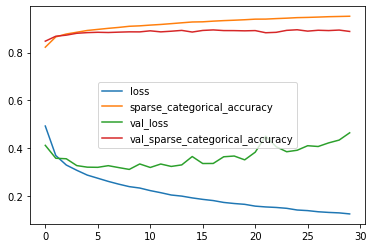

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    x_train,y_train,
    epochs=30,
    validation_split=0.2, verbose=2
)

history_df = pd.DataFrame(history.history)
history_df.plot()

loss, accuracy = model.evaluate(test1X, test1y)
print(accuracy, loss, test1X.shape)

[[432   0   7   7   1   1  57   0   2   0]
 [  1 473   1   6   0   0   0   0   0   0]
 [  6   1 421   6  40   0  47   0   0   0]
 [ 21   3   6 431  18   1  16   0   4   0]
 [  0   0  77  19 389   0  35   0   1   0]
 [  0   0   0   0   0 476   0   5   0   4]
 [ 61   1  35  11  18   0 353   0   3   0]
 [  0   0   0   0   0  19   0 473   0   8]
 [  4   0   3   3   2   3   6   1 504   0]
 [  0   0   0   0   0  12   0  26   0 439]]


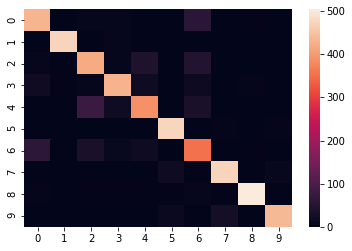

In [ ]:
predict = model.predict(test1X)
result = []
for s in range(len(predict)):
  maximum = max(predict[s])
  pre = [i for i, j in enumerate(predict[s]) if j == maximum]
  result.append(pre[0])

cf_matrix = confusion_matrix(test1y, result)
print(cf_matrix)
sns.heatmap(cf_matrix)



1.   Hidden layer: relu
2.   optimizer: RMSprop



Epoch 1/30
1500/1500 - 7s - loss: 0.5134 - sparse_categorical_accuracy: 0.8123 - val_loss: 0.4741 - val_sparse_categorical_accuracy: 0.8169
Epoch 2/30
1500/1500 - 7s - loss: 0.3940 - sparse_categorical_accuracy: 0.8586 - val_loss: 0.4026 - val_sparse_categorical_accuracy: 0.8583
Epoch 3/30
1500/1500 - 6s - loss: 0.3677 - sparse_categorical_accuracy: 0.8710 - val_loss: 0.3698 - val_sparse_categorical_accuracy: 0.8720
Epoch 4/30
1500/1500 - 7s - loss: 0.3530 - sparse_categorical_accuracy: 0.8771 - val_loss: 0.4070 - val_sparse_categorical_accuracy: 0.8690
Epoch 5/30
1500/1500 - 7s - loss: 0.3411 - sparse_categorical_accuracy: 0.8811 - val_loss: 0.3746 - val_sparse_categorical_accuracy: 0.8768
Epoch 6/30
1500/1500 - 7s - loss: 0.3385 - sparse_categorical_accuracy: 0.8846 - val_loss: 0.4138 - val_sparse_categorical_accuracy: 0.8738
Epoch 7/30
1500/1500 - 7s - loss: 0.3240 - sparse_categorical_accuracy: 0.8891 - val_loss: 0.4573 - val_sparse_categorical_accuracy: 0.8603
Epoch 8/30
1500/1500

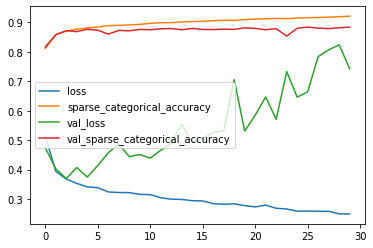

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    x_train,y_train,
    epochs=30,
    validation_split=0.2, verbose=2
)

history_df = pd.DataFrame(history.history)
history_df.plot()

157/157 [==============================] - 0s 2ms/step - loss: 2.7717 - sparse_categorical_accuracy: 0.5580
0.5580000281333923 2.771714448928833 (5000, 28, 28)
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.6999546e-04
  0.0000000e+00 9.9869710e-01]
 [1.2564442e-01 1.6285967e-02 1.9412297e-01 ... 5.1031090e-02
  7.8216381e-02 2.6164798e-02]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [1.2564442e-01 1.6285967e-02 1.9412297e-01 ... 5.1031090e-02
  7.8216381e-02 2.6164798e-02]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]]
[[ 74   0 424   5   0   3   1   0   0   0]
 [  0 444  30   6   0   0   1   0   0   0]
 [  0   1 520   0   0   0   0   0   0   0]
 [  0   9 200 289   0   0   1   0   1   0]
 [  0   0 519   0   0   1   0   0   1   0]
 [  0   0  59   1   0 412   0   9   1   3]
 [  4   0 478   0 

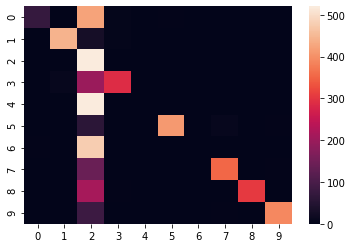

In [ ]:
loss, accuracy = model.evaluate(test1X, test1y)
print(accuracy, loss, test1X.shape)
predict = model.predict(test1X)
print(predict)
result = []
for s in range(len(predict)):
  maximum = max(predict[s])
  pre = [i for i, j in enumerate(predict[s]) if j == maximum]
  result.append(pre[0])

cf_matrix = confusion_matrix(test1y, result)
print(cf_matrix)
sns.heatmap(cf_matrix)



1.   Hidden layer: relu
2.   optimizer: Nadam



Epoch 1/30
1875/1875 [==============================] - 11s 6ms/step - loss: 7.2198 - sparse_categorical_accuracy: 0.7068 - val_loss: 0.5997 - val_sparse_categorical_accuracy: 0.7980
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5066 - sparse_categorical_accuracy: 0.8261 - val_loss: 0.4799 - val_sparse_categorical_accuracy: 0.8310
Epoch 3/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4489 - sparse_categorical_accuracy: 0.8440 - val_loss: 0.5084 - val_sparse_categorical_accuracy: 0.8308
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4413 - sparse_categorical_accuracy: 0.8491 - val_loss: 0.4368 - val_sparse_categorical_accuracy: 0.8444
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4021 - sparse_categorical_accuracy: 0.8583 - val_loss: 0.4234 - val_sparse_categorical_accuracy: 0.8484
Epoch 6/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3850 -

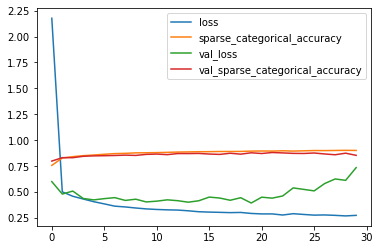

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Nadam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    trainX,trainy,
    epochs=30,
    validation_data=(validX, validy)
)

history_df = pd.DataFrame(history.history)
history_df.plot()

loss, accuracy = model.evaluate(test1X, test1y)
print(accuracy, loss, test1X.shape)

157/157 [==============================] - 0s 2ms/step - loss: 0.5273 - sparse_categorical_accuracy: 0.8448
0.8447999954223633 0.5272934436798096 (5000, 28, 28)
[[411   1   1  12   0   0  80   0   2   0]
 [  1 470   0   9   0   0   1   0   0   0]
 [  4   1 325   9  57   0 125   0   0   0]
 [ 14   7   2 455   1   0  19   0   2   0]
 [  0   0  25  54 328   0 114   0   0   0]
 [  0   0   0   0   0 476   3   2   1   3]
 [ 63   1  25  14   9   0 365   0   5   0]
 [  0   0   0   0   0  35   1 456   0   8]
 [  0   1   0   3   0   0  16   1 505   0]
 [  0   0   0   0   0   9   5  30   0 433]]


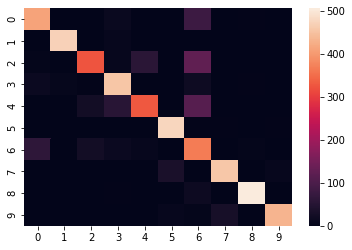

In [ ]:
loss, accuracy = model.evaluate(test1X, test1y)
print(accuracy, loss, test1X.shape)
predict = model.predict(test1X)
result = []
for s in range(len(predict)):
  maximum = max(predict[s])
  pre = [i for i, j in enumerate(predict[s]) if j == maximum]
  result.append(pre[0])

cf_matrix = confusion_matrix(test1y, result)
print(cf_matrix)
sns.heatmap(cf_matrix)


--------------------------------------------------------------------------------
1.   hidden layer: tanh
2.   optimizer: SGD



Epoch 1/30
1500/1500 - 5s - loss: 0.9935 - sparse_categorical_accuracy: 0.6531 - val_loss: 0.9228 - val_sparse_categorical_accuracy: 0.6929
Epoch 2/30
1500/1500 - 5s - loss: 0.9381 - sparse_categorical_accuracy: 0.6531 - val_loss: 0.8625 - val_sparse_categorical_accuracy: 0.6787
Epoch 3/30
1500/1500 - 5s - loss: 0.9593 - sparse_categorical_accuracy: 0.6413 - val_loss: 0.9003 - val_sparse_categorical_accuracy: 0.6654
Epoch 4/30
1500/1500 - 5s - loss: 0.9534 - sparse_categorical_accuracy: 0.6403 - val_loss: 0.8872 - val_sparse_categorical_accuracy: 0.6361
Epoch 5/30
1500/1500 - 4s - loss: 0.9000 - sparse_categorical_accuracy: 0.6545 - val_loss: 0.8468 - val_sparse_categorical_accuracy: 0.6838
Epoch 6/30
1500/1500 - 4s - loss: 0.9019 - sparse_categorical_accuracy: 0.6509 - val_loss: 0.8778 - val_sparse_categorical_accuracy: 0.6718
Epoch 7/30
1500/1500 - 4s - loss: 0.9202 - sparse_categorical_accuracy: 0.6389 - val_loss: 0.9692 - val_sparse_categorical_accuracy: 0.5832
Epoch 8/30
1500/1500

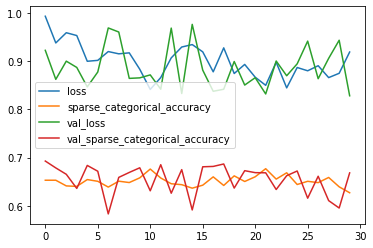

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300,activation='tanh'),
  tf.keras.layers.Dense(100,activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    trainX,trainy,
    epochs=30,
    validation_split=0.2,verbose=2
)

history_df = pd.DataFrame(history.history)
history_df.plot()

loss, accuracy = model.evaluate(test1X, test1y)
print(accuracy, loss, test1X.shape)

157/157 [==============================] - 0s 2ms/step - loss: 0.8341 - sparse_categorical_accuracy: 0.6562
0.6561999917030334 0.8340784907341003 (5000, 28, 28)
[[383   1  22  45   0   0  39   0  17   0]
 [ 20 430   7  18   0   0   5   0   1   0]
 [  7   0 457   3   1   0  47   0   6   0]
 [125  11   9 281   0   0  68   0   6   0]
 [ 25   0 355   8   1   1 127   0   4   0]
 [  0   0   0   0   0 312   0  60  10 103]
 [108   1 268  24   2   0  63   0  16   0]
 [  0   0   0   0   0  12   0 434   5  49]
 [  1   2  18   3   1   2   6   2 489   2]
 [  0   0   0   0   0  11   0  35   0 431]]


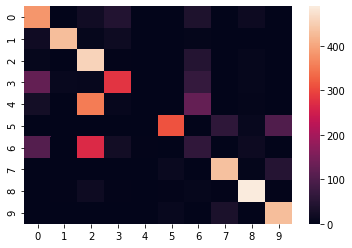

In [ ]:
loss, accuracy = model.evaluate(test1X, test1y)
print(accuracy, loss, test1X.shape)
predict = model.predict(test1X)
result = []
for s in range(len(predict)):
  maximum = max(predict[s])
  pre = [i for i, j in enumerate(predict[s]) if j == maximum]
  result.append(pre[0])

cf_matrix = confusion_matrix(test1y, result)
print(cf_matrix)
sns.heatmap(cf_matrix)


--------------------------------------------------------------------------------
1.   Hidden layer: sigmoid
2.   optimizer: SGD



Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4741 - sparse_categorical_accuracy: 0.6249 - val_loss: 0.7350 - val_sparse_categorical_accuracy: 0.7618
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6780 - sparse_categorical_accuracy: 0.7826 - val_loss: 0.6156 - val_sparse_categorical_accuracy: 0.7914
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5910 - sparse_categorical_accuracy: 0.8012 - val_loss: 0.5859 - val_sparse_categorical_accuracy: 0.7920
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5571 - sparse_categorical_accuracy: 0.8101 - val_loss: 0.5899 - val_sparse_categorical_accuracy: 0.7940
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5537 - sparse_categorical_accuracy: 0.8095 - val_loss: 0.5835 - val_sparse_categorical_accuracy: 0.7882
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5436 - spars

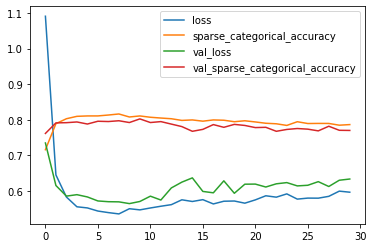

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300,activation='sigmoid'),
  tf.keras.layers.Dense(100,activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    trainX,trainy,
    epochs=30,
    validation_data=(validX, validy)
)

history_df = pd.DataFrame(history.history)
history_df.plot()

loss, accuracy = model.evaluate(test1X, test1y)
print(accuracy, loss, test1X.shape)

157/157 [==============================] - 0s 2ms/step - loss: 0.6360 - sparse_categorical_accuracy: 0.7702
0.7702000141143799 0.6359674334526062 (5000, 28, 28)
[[435   0   8  40   3   0  12   0   9   0]
 [  9 436   7  27   1   0   1   0   0   0]
 [ 29   0 364   7  83   0  38   0   0   0]
 [ 48   6   2 424   7   0  10   0   3   0]
 [ 24   0 166  40 241   0  46   0   4   0]
 [  1   0   0   1   0 434   0  20   1  28]
 [158   1  78  22  66   0 147   0  10   0]
 [  0   0   0   0   0  24   0 447   0  29]
 [  6   1  15   3   6   2   6   2 483   2]
 [  0   0   0   2   0   5   0  30   0 440]]


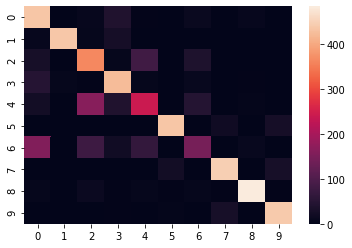

In [ ]:
loss, accuracy = model.evaluate(test1X, test1y)
print(accuracy, loss, test1X.shape)
predict = model.predict(test1X)
result = []
for s in range(len(predict)):
  maximum = max(predict[s])
  pre = [i for i, j in enumerate(predict[s]) if j == maximum]
  result.append(pre[0])

cf_matrix = confusion_matrix(test1y, result)
print(cf_matrix)
sns.heatmap(cf_matrix)



1.   hidden layer: elu
2.   optimizer: SGD



Epoch 1/30
1500/1500 - 5s - loss: 0.6646 - sparse_categorical_accuracy: 0.7772 - val_loss: 0.5097 - val_sparse_categorical_accuracy: 0.8183
Epoch 2/30
1500/1500 - 4s - loss: 0.4846 - sparse_categorical_accuracy: 0.8310 - val_loss: 0.4609 - val_sparse_categorical_accuracy: 0.8340
Epoch 3/30
1500/1500 - 4s - loss: 0.4482 - sparse_categorical_accuracy: 0.8422 - val_loss: 0.4424 - val_sparse_categorical_accuracy: 0.8406
Epoch 4/30
1500/1500 - 4s - loss: 0.4278 - sparse_categorical_accuracy: 0.8505 - val_loss: 0.4425 - val_sparse_categorical_accuracy: 0.8411
Epoch 5/30
1500/1500 - 4s - loss: 0.4109 - sparse_categorical_accuracy: 0.8555 - val_loss: 0.4345 - val_sparse_categorical_accuracy: 0.8464
Epoch 6/30
1500/1500 - 4s - loss: 0.3993 - sparse_categorical_accuracy: 0.8584 - val_loss: 0.4042 - val_sparse_categorical_accuracy: 0.8547
Epoch 7/30
1500/1500 - 4s - loss: 0.3881 - sparse_categorical_accuracy: 0.8617 - val_loss: 0.3974 - val_sparse_categorical_accuracy: 0.8586
Epoch 8/30
1500/1500

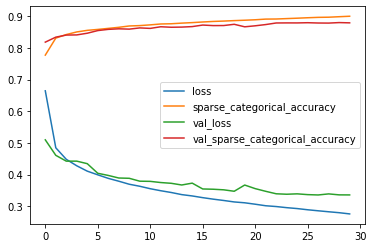

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300,activation='elu'),
  tf.keras.layers.Dense(100,activation='elu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    x_train,y_train,
    epochs=30,
    validation_split=0.2,verbose=2
)

history_df = pd.DataFrame(history.history)
history_df.plot()

loss, accuracy = model.evaluate(test1X, test1y)
print(accuracy, loss, test1X.shape)

157/157 [==============================] - 0s 2ms/step - loss: 0.3635 - sparse_categorical_accuracy: 0.8746
0.8745999932289124 0.3634796738624573 (5000, 28, 28)
[[418   1  10  25   4   0  39   0  10   0]
 [  0 466   0  15   0   0   0   0   0   0]
 [  7   0 393  16  69   0  32   1   3   0]
 [  7   1   6 467   7   1   7   0   4   0]
 [  0   0  33  30 433   0  23   0   2   0]
 [  0   0   0   0   0 465   0  12   1   7]
 [ 51   1  44  25  44   0 304   0  13   0]
 [  0   0   0   0   0  18   0 473   0   9]
 [  3   0   1   6   2   1   4   4 505   0]
 [  0   0   0   0   0   7   0  21   0 449]]


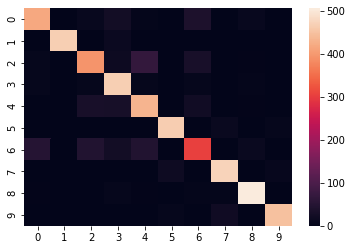

In [ ]:
loss, accuracy = model.evaluate(test1X, test1y)
print(accuracy, loss, test1X.shape)
predict = model.predict(test1X)
result = []
for s in range(len(predict)):
  maximum = max(predict[s])
  pre = [i for i, j in enumerate(predict[s]) if j == maximum]
  result.append(pre[0])

cf_matrix = confusion_matrix(test1y, result)
print(cf_matrix)
sns.heatmap(cf_matrix)

Epoch 1/30
1500/1500 - 4s - loss: 0.7526 - sparse_categorical_accuracy: 0.7605 - val_loss: 0.5546 - val_sparse_categorical_accuracy: 0.8150
Epoch 2/30
1500/1500 - 4s - loss: 0.5210 - sparse_categorical_accuracy: 0.8253 - val_loss: 0.5018 - val_sparse_categorical_accuracy: 0.8238
Epoch 3/30
1500/1500 - 4s - loss: 0.4733 - sparse_categorical_accuracy: 0.8392 - val_loss: 0.4583 - val_sparse_categorical_accuracy: 0.8405
Epoch 4/30
1500/1500 - 4s - loss: 0.4473 - sparse_categorical_accuracy: 0.8471 - val_loss: 0.4493 - val_sparse_categorical_accuracy: 0.8390
Epoch 5/30
1500/1500 - 4s - loss: 0.4292 - sparse_categorical_accuracy: 0.8531 - val_loss: 0.4350 - val_sparse_categorical_accuracy: 0.8445
Epoch 6/30
1500/1500 - 4s - loss: 0.4151 - sparse_categorical_accuracy: 0.8574 - val_loss: 0.4246 - val_sparse_categorical_accuracy: 0.8521
Epoch 7/30
1500/1500 - 4s - loss: 0.4041 - sparse_categorical_accuracy: 0.8604 - val_loss: 0.4079 - val_sparse_categorical_accuracy: 0.8576
Epoch 8/30
1500/1500

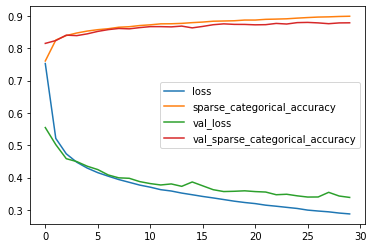

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    x_train,y_train,
    epochs=30,
    validation_split=0.2,verbose=2
)

history_df = pd.DataFrame(history.history)
history_df.plot()

loss, accuracy = model.evaluate(test1X, test1y)
print(accuracy, loss, test1X.shape)

In [ ]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    # conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    # conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    # conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    # conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    # conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    # conv3 = BatchNormalization()(conv3)
    # conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)
    # conv4 = BatchNormalization()(conv4)
    # conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    # conv4 = BatchNormalization()(conv4)
    return conv3

def decoder(conv4):    
  #decoder
  conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
  conv5 = BatchNormalization()(conv5)
  # conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
  # conv5 = BatchNormalization()(conv5)
  conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
  conv6 = BatchNormalization()(conv6)
  # conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
  # conv6 = BatchNormalization()(conv6)
  up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
  conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
  conv7 = BatchNormalization()(conv7)
  # conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
  # conv7 = BatchNormalization()(conv7)
  up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
  decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
  return decoded

In [ ]:
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
batch_size = 64
epochs = 10
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))
num_classes = 10
import keras
import tensorflow as tf
import numpy as np
from matplotlib import pyplot
# Load dataset
(trainX, trainy), (testX, testy) = keras.datasets.fashion_mnist.load_data()
# Summarize loaded dataset
(test1X, test1y) = (testX[0:5000], testy[0:5000])
(validX, validy) = (testX[5000:], testy[5000:])
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (test1X.shape, test1y.shape))
print('Validation: X=%s, y=%s' % (validX.shape, validy.shape))

train_data = trainX / np.max(trainX)
test_data = testX / np.max(testy)

from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(train_data,
                                                             train_data,
                                                             test_size=0.2,
                                                             random_state=13)

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(5000, 28, 28), y=(5000,)
Validation: X=(5000, 28, 28), y=(5000,)


In [ ]:
from keras.models import Model,Sequential
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop
autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [ ]:
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=1,verbose=1,validation_data=(valid_X, valid_ground))

750/750 [==============================] - 304s 405ms/step - loss: 0.0036 - val_loss: 0.0033


In [ ]:
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    return out
encode = encoder(input_img)
full_model = Model(input_img,fc(encode))
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])